Network Info:
	Learning rate: 0.001
	Max number of epochs: 300
	Cost Function: <function costFunction at 0x7f8c6c1ae8c0>
	Train Loop Callback: None
	Cuda Available: True
	Network Structure
		Linear(in_features=22, out_features=200, bias=True) , relu
		Linear(in_features=200, out_features=200, bias=True) , relu
		Linear(in_features=200, out_features=200, bias=True) , relu
		Linear(in_features=200, out_features=1, bias=True) , none



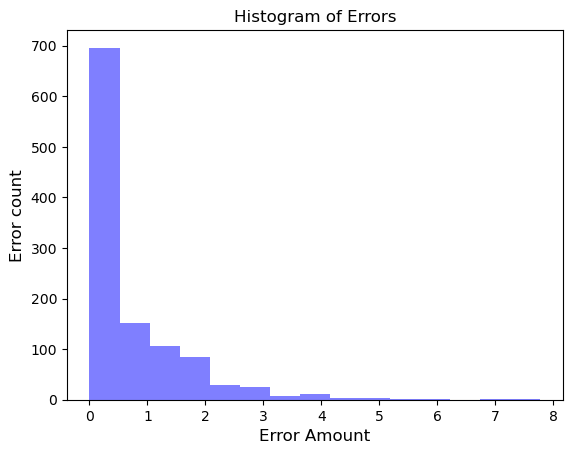

Avg error: 0.7205

['y' 'ŷ']
[33.86 33.89]
[37.43 37.61]
[39.57 39.01]
[38.86 39.05]
[37.29 37.46]
[38.86 39.06]
[39.   39.3 ]
[39.71 39.42]
[36.57 37.71]
[35.   35.4 ]
[39.14 39.17]
[38.86 39.04]
[38.43 39.41]
[38.71 38.38]
[38.57 39.68]
[39.14 38.4 ]
[39.71 39.79]
[39.71 39.74]
[37.71 38.39]
[38.57 41.13]
[39.43 39.54]
[39.14 38.91]
[39.86 38.27]
[37.43 37.37]
[36.   38.44]
[38.86 38.72]
[40.57 38.83]
[38.14 38.37]
[38.29 38.21]
[38.71 38.9 ]
[39.29 37.52]
[39.29 37.6 ]
[39.14 36.15]
[36.86 36.97]
[39.57 39.44]
[39.   39.12]
[37.   37.19]
[38.57 38.31]
[34.14 38.3 ]
[39.29 39.21]
[39.   40.59]
[35.57 38.44]
[39.29 39.54]
[35.86 39.8 ]
[38.86 40.04]
[37.14 36.95]
[37.71 39.29]
[38.14 39.06]
[38.86 37.96]
[38.86 39.23]
[39.71 40.16]
[38.86 38.99]
[41.57 39.46]
[38.43 37.71]
[40.   39.5 ]
[39.   38.67]
[37.14 37.49]
[37.57 38.68]
[38.57 37.86]
[40.14 39.05]
[38.57 38.13]
[39.   39.16]
[39.43 36.22]
[35.71 37.85]
[38.43 38.27]
[35.57 37.97]
[39.   39.04]
[37.14 38.68]
[37.   36.85]
[38.5

In [3]:
#!/usr/bin/env python

import wuml
import numpy as np
import torch
import wplotlib
import torch.nn as nn
from torch.autograd import Variable

''' Weighted Regression
	Each sample is weighted based on its likelihood to balance the data
	
'''
 
data = wuml.wData(xpath='../../data/Chem_decimated_imputed.csv', batch_size=20, 
					label_type='continuous', label_column_name='finalga_best', 
					row_id_with_label=0, columns_to_ignore=['id'])

data = wuml.center_and_scale(data)

weights = wuml.wData(xpath='../../data/Chem_sample_weights.csv')
weights = weights.get_data_as('Tensor')

def costFunction(x, y, ŷ, ind):
	relu = nn.ReLU()

	W = torch.squeeze(weights[ind])
	n = len(ind)
	ŷ = torch.squeeze(ŷ)
	y = torch.squeeze(y)

	penalty = torch.sum(relu(W*(ŷ - y)))/n	# This will penalize predictions higher than true labels
	loss = torch.sum(W*((y - ŷ)**2))/n + 0.8*penalty
	return loss


bNet = wuml.basicNetwork(costFunction, data, networkStructure=[(200,'relu'),(200,'relu'),(200,'relu'),(1,'none')], max_epoch=300, learning_rate=0.001)
bNet.train(print_status=False)

Ŷ = bNet(data, output_type='ndarray')
output = wuml.output_regression_result(data.Y, Ŷ)
print(output)

